In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Questions 1-3

In [ ]:
x1_min, x1_max = -10, 10
x2_min, x2_max = -10, 10
N_points = 100

x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,N_points), np.linspace(x2_min,x2_max,N_points))

In [ ]:
def f(x):
    '''
    Implementation of an example function.
    '''
    x1 = x[0]
    x2 = x[1]
    return (x1**2+x2**2)*(np.cos(x1) + np.sin(x2))

In [ ]:
y = f(np.array([x1,x2]))

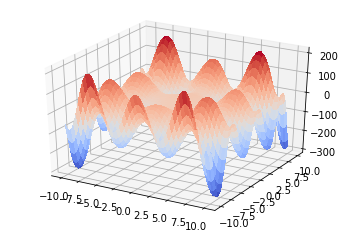

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

Question 4

$f(x_1,x_2)=(x_1^2+x_2^2)\times (cos(x_1) + sin(x_2))$

$\frac{\partial f}{\partial x_1}=\left[\frac{\partial (x_1^2+x_2^2)}{\partial x_1}\right]\cdot (cos(x_1)+sin(x_2))+[x_1^2+x_2^2]\cdot \frac{\partial (cos(x_1)+sin(x_2))}{\partial x_1}=2x_1\cdot (cos(x_1)+sin(x_2))-\sin(x_1)\cdot (x_1^2+x_2^2)$

$\frac{\partial f}{\partial x_2}=\left[\frac{\partial (x_1^2+x_2^2)}{\partial x_2}\right]\cdot (cos(x_1)+sin(x_2))+[x_1^2+x_2^2]\cdot \frac{\partial (cos(x_1)+sin(x_2))}{\partial x_2}=2x_2\cdot (cos(x_1)+sin(x_2))+\cos(x_2)\cdot (x_1^2+x_2^2)$

In [ ]:
def grad_f(x):
    '''
    Impelementation of the gradient of the example function.
    '''
    x1 = x[0]
    x2 = x[1]
    
    gf1 = 2*x1*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(-np.sin(x1))
    gf2 = 2*x2*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(np.cos(x2))
    
    return np.array([gf1,gf2])

In [ ]:
def GD_alg(f, grad_f, x0, mu, K):
    '''
    Implementation of the Gradient Descent (GD) algorithm.
    '''
    x = x0.copy()
    f_values = []
    grad_f_norm = []
    
    for k in range(K):
        f_values.append(f(x)) # cost values
        grad_f_x = grad_f(x) # gradient values
        grad_f_x_norm = np.linalg.norm(grad_f_x)
        grad_f_norm.append(grad_f_x_norm) # norm of the gradient vector
        
        x = x - mu*grad_f_x # GD iteration
        
        if k%20==0:
            print('Iteration: {}/{} --- Cost: {:0.3f} --- Gradient norm: {:0.3f} --- x: ({:.3f},{:.3f})\n'.format(k,K,f(x),grad_f_x_norm,x[0],x[1]))
        
    return x, np.array(f_values), np.array(grad_f_norm)

In [ ]:
x0 = np.array([0.5,0.5])
mu = 0.05
K = 100
x, f_values, grad_f_norm = GD_alg(f, grad_f, x0, mu, K)

Iteration: 0/100 --- Cost: 0.476 --- Gradient norm: 2.115 --- x: (0.444,0.410)

Iteration: 20/100 --- Cost: 0.003 --- Gradient norm: 0.122 --- x: (0.046,0.025)

Iteration: 40/100 --- Cost: 0.000 --- Gradient norm: 0.014 --- x: (0.005,0.003)

Iteration: 60/100 --- Cost: 0.000 --- Gradient norm: 0.002 --- x: (0.001,0.000)

Iteration: 80/100 --- Cost: 0.000 --- Gradient norm: 0.000 --- x: (0.000,0.000)



In [ ]:
x0 = np.array([0.5,0.5])
mu = 5
K = 100
x, f_values, grad_f_norm = GD_alg(f, grad_f, x0, mu, K)

Iteration: 0/100 --- Cost: -43.558 --- Gradient norm: 2.115 --- x: (-5.086,-8.479)

Iteration: 20/100 --- Cost: nan --- Gradient norm: nan --- x: (nan,nan)

Iteration: 40/100 --- Cost: nan --- Gradient norm: nan --- x: (nan,nan)

Iteration: 60/100 --- Cost: nan --- Gradient norm: nan --- x: (nan,nan)

Iteration: 80/100 --- Cost: nan --- Gradient norm: nan --- x: (nan,nan)



<ipython-input-4-c16de29c1fa5>:7: RuntimeWarning: overflow encountered in double_scalars
  return (x1**2+x2**2)*(np.cos(x1) + np.sin(x2))
<ipython-input-11-507bf1acefab>:8: RuntimeWarning: overflow encountered in double_scalars
  gf1 = 2*x1*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(-np.sin(x1))
<ipython-input-11-507bf1acefab>:9: RuntimeWarning: overflow encountered in double_scalars
  gf2 = 2*x2*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(np.cos(x2))
<ipython-input-4-c16de29c1fa5>:7: RuntimeWarning: invalid value encountered in cos
  return (x1**2+x2**2)*(np.cos(x1) + np.sin(x2))
<ipython-input-4-c16de29c1fa5>:7: RuntimeWarning: invalid value encountered in sin
  return (x1**2+x2**2)*(np.cos(x1) + np.sin(x2))
<ipython-input-11-507bf1acefab>:8: RuntimeWarning: invalid value encountered in cos
  gf1 = 2*x1*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**2)*(-np.sin(x1))
<ipython-input-11-507bf1acefab>:8: RuntimeWarning: invalid value encountered in sin
  gf1 = 2*x1*(np.cos(x1)+np.sin(x2)) + (x1**2+x2**

In [ ]:
x0 = np.array([0.5,0.5])
mu = 0.000005
K = 100
x, f_values, grad_f_norm = GD_alg(f, grad_f, x0, mu, K)

Iteration: 0/100 --- Cost: 0.678 --- Gradient norm: 2.115 --- x: (0.500,0.500)

Iteration: 20/100 --- Cost: 0.678 --- Gradient norm: 2.114 --- x: (0.500,0.500)

Iteration: 40/100 --- Cost: 0.678 --- Gradient norm: 2.113 --- x: (0.500,0.500)

Iteration: 60/100 --- Cost: 0.677 --- Gradient norm: 2.113 --- x: (0.500,0.499)

Iteration: 80/100 --- Cost: 0.677 --- Gradient norm: 2.112 --- x: (0.500,0.499)



In [ ]:
x0 = np.array([-9.5,0.5])
mu = 0.05
K = 100
x, f_values, grad_f_norm = GD_alg(f, grad_f, x0, mu, K)

Iteration: 0/100 --- Cost: -70.935 --- Gradient norm: 78.962 --- x: (-9.652,-3.445)

Iteration: 20/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)

Iteration: 40/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)

Iteration: 60/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)

Iteration: 80/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)



In [ ]:
x0 = np.array([9.5,1.5])
mu = 0.05
K = 100
x, f_values, grad_f_norm = GD_alg(f, grad_f, x0, mu, K)

Iteration: 0/100 --- Cost: -3.510 --- Gradient norm: 9.552 --- x: (9.152,1.173)

Iteration: 20/100 --- Cost: -139.855 --- Gradient norm: 53.389 --- x: (3.702,-7.875)

Iteration: 40/100 --- Cost: -31.474 --- Gradient norm: 0.010 --- x: (-3.901,-1.916)

Iteration: 60/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)

Iteration: 80/100 --- Cost: -31.474 --- Gradient norm: 0.000 --- x: (-3.901,-1.916)



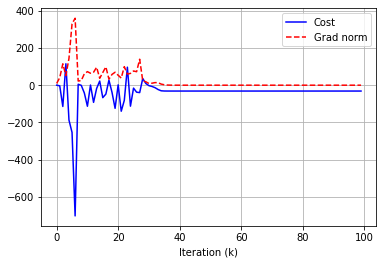

In [ ]:
%matplotlib inline
plt.plot(range(K), f_values, 'b', label='Cost')
plt.plot(range(K), grad_f_norm, '--r', label='Grad norm')
plt.legend()
plt.xlabel('Iteration (k)', fontsize = 10)
plt.grid()

# Other stopping criteria

In [ ]:
def GD_algStop(f, grad_f, x0, mu, K, thr, stop_criterion = 'grad_norm'):
    '''
    Gradient Descent with a stopping criterion based on cost/gradient's norm values.
    '''
    x = x0.copy()
    f_values = []
    grad_f_norm = []
    f_prev = np.inf
    
    for k in range(K):
        f_new = f(x)
        f_values.append(f_new) # cost values
        grad_f_x = grad_f(x) # gradient values
        grad_f_x_norm = np.linalg.norm(grad_f_x)
        grad_f_norm.append(grad_f_x_norm) # norm of the gradient vector
        
        if stop_criterion == 'grad_norm':
            # Stopping criterion based on norm of the gradient:
            if grad_f_x_norm <= thr:
                break

        if stop_criterion == 'f_difference':       
            # Stopping criterion based on cost decrease:
            if np.abs(f_prev-f_new) <= thr:
                break
            f_prev = f_new
        
        x = x - mu*grad_f_x # GD iteration
        
        if k%20==0:
            print('Iteration: {}/{} --- Cost: {:0.3f} --- Gradient norm: {:0.3f} --- x: ({:.3f},{:.3f})\n'.format(k,K,f(x),grad_f_x_norm,x[0],x[1]))
        
    return x, np.array(f_values), np.array(grad_f_norm), k

In [ ]:
x0 = np.array([0.5,0.5])
mu = 0.05
K = 100
thr = 0.001
x, f_values, grad_f_norm, k = GD_algStop(f, grad_f, x0, mu, K, thr, stop_criterion = 'f_difference')
print('Number of performed iterations: ', k)

Iteration: 0/100 --- Cost: 0.476 --- Gradient norm: 2.115 --- x: (0.444,0.410)

Number of performed iterations:  20
